In [1]:
#패키지 임포트
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
#파일 불러오기
df = pd.read_csv("rain.csv", encoding='euc-kr')

In [3]:
df.head()

,날짜,강수량(mm)
0,18-01-01,NaN
1,18-01-02,NaN
2,18-01-03,NaN
3,18-01-04,NaN
4,18-01-05,NaN


In [4]:
df.isnull().sum()

날짜           0
강수량(mm)    883
dtype: int64

In [5]:
df = df.fillna(0)

In [6]:
df.rename(columns = {"날짜": "일자"}, inplace = True)
df.head()

,일자,강수량(mm)
0,18-01-01,0.0
1,18-01-02,0.0
2,18-01-03,0.0
3,18-01-04,0.0
4,18-01-05,0.0


<AxesSubplot:title={'center':'강우량'}, xlabel='일자'>

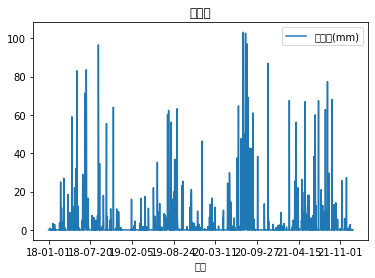

In [8]:
df2 = df.set_index('일자')
df2.plot(title = '강우량')

In [9]:
#파일 불러오기
df2 = pd.read_csv("temp_win.csv", encoding='euc-kr')
df3 = pd.read_csv("temp_sum.csv", encoding='euc-kr')

In [10]:
df2.head()

,일자,기온(°C),풍속(m/s),체감온도(°C)
0,18-01-01,-4.6,5.8,-7.2
1,18-01-02,-4.1,15.1,-9.5
2,18-01-03,-6.4,16.9,-12.7
3,18-01-04,-7.7,14.4,-13.8
4,18-01-05,-5.5,7.9,-9.2


In [11]:
df2.isnull().sum()

일자            0
기온(°C)      702
풍속(m/s)     702
체감온도(°C)    702
dtype: int64

In [12]:
df2.shape

(1461, 4)

In [13]:
df3.head()

,일자,기온(°C),습도(%rh),체감온도(°C)
0,18-05-01,23.2,63.4,24.5
1,18-05-02,19.7,76.0,21.8
2,18-05-03,14.1,60.6,15.3
3,18-05-04,19.8,29.9,18.5
4,18-05-05,24.5,30.2,22.9


In [14]:
df3.isnull().sum()

일자          0
기온(°C)      0
습도(%rh)     0
체감온도(°C)    0
dtype: int64

In [16]:
new2 = pd.merge(df2, df3, how='outer',on='일자')
new2.head()

,일자,기온(°C)_x,풍속(m/s),체감온도(°C)_x,기온(°C)_y,습도(%rh),체감온도(°C)_y
0,18-01-01,-4.6,5.8,-7.2,NaN,NaN,NaN
1,18-01-02,-4.1,15.1,-9.5,NaN,NaN,NaN
2,18-01-03,-6.4,16.9,-12.7,NaN,NaN,NaN
3,18-01-04,-7.7,14.4,-13.8,NaN,NaN,NaN
4,18-01-05,-5.5,7.9,-9.2,NaN,NaN,NaN


In [17]:
new2.shape

(1461, 7)

<AxesSubplot:>

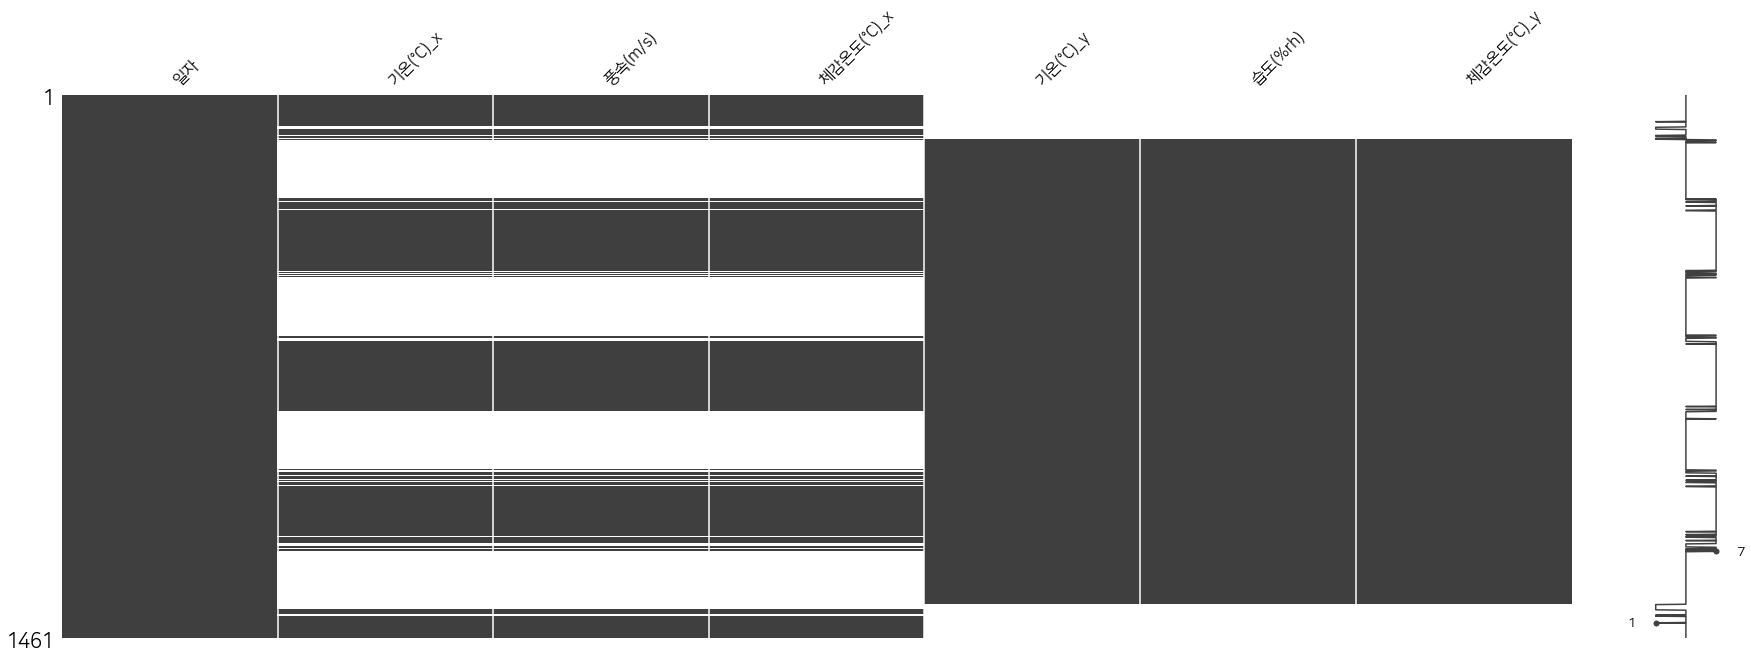

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

#결측치 시각화
import missingno as msno
import matplotlib as mat
#한글폰트 나눔스퀘어 지정
mat.rcParams['font.family'] = 'NanumSquare'

msno.matrix(new2, figsize=(30,10))

In [19]:
new2 = new2.fillna(0)

In [20]:
new2.rename(columns = {"기온(°C)_x": "기온_겨울","기온(°C)_y": "기온_여름", "체감온도(°C)_x": "체감온도_겨울","체감온도(°C)_y": "체감온도_여름"}, inplace = True)
new2.head()

,일자,기온_겨울,풍속(m/s),체감온도_겨울,기온_여름,습도(%rh),체감온도_여름
0,18-01-01,-4.6,5.8,-7.2,0.0,0.0,0.0
1,18-01-02,-4.1,15.1,-9.5,0.0,0.0,0.0
2,18-01-03,-6.4,16.9,-12.7,0.0,0.0,0.0
3,18-01-04,-7.7,14.4,-13.8,0.0,0.0,0.0
4,18-01-05,-5.5,7.9,-9.2,0.0,0.0,0.0


In [21]:
new3 = new2.set_index('일자')

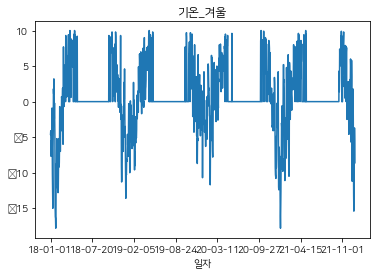

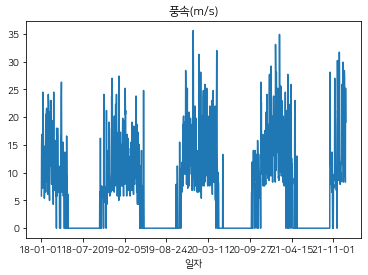

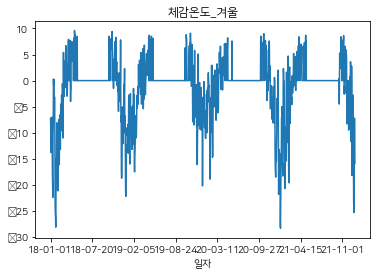

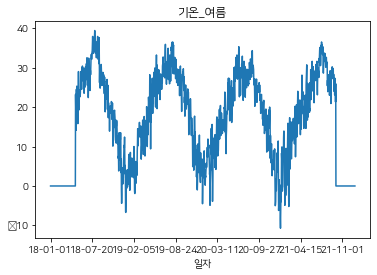

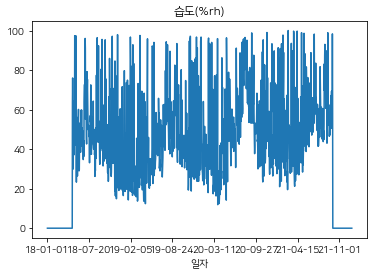

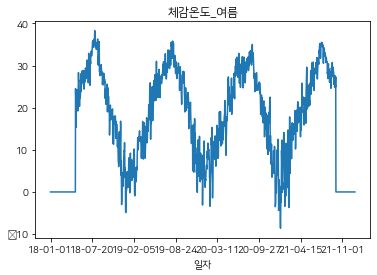

In [22]:
colum = new3.columns
for col in colum:
    new3[col].plot(title = col)
    plt.show()

In [23]:
fin = pd.merge(df, new2, how='outer',on='일자')
fin.head()

,일자,강수량(mm),기온_겨울,풍속(m/s),체감온도_겨울,기온_여름,습도(%rh),체감온도_여름
0,18-01-01,0.0,-4.6,5.8,-7.2,0.0,0.0,0.0
1,18-01-02,0.0,-4.1,15.1,-9.5,0.0,0.0,0.0
2,18-01-03,0.0,-6.4,16.9,-12.7,0.0,0.0,0.0
3,18-01-04,0.0,-7.7,14.4,-13.8,0.0,0.0,0.0
4,18-01-05,0.0,-5.5,7.9,-9.2,0.0,0.0,0.0


In [24]:
fin.to_csv('./weather_EDA.csv')